In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

Required sample size (n): 97


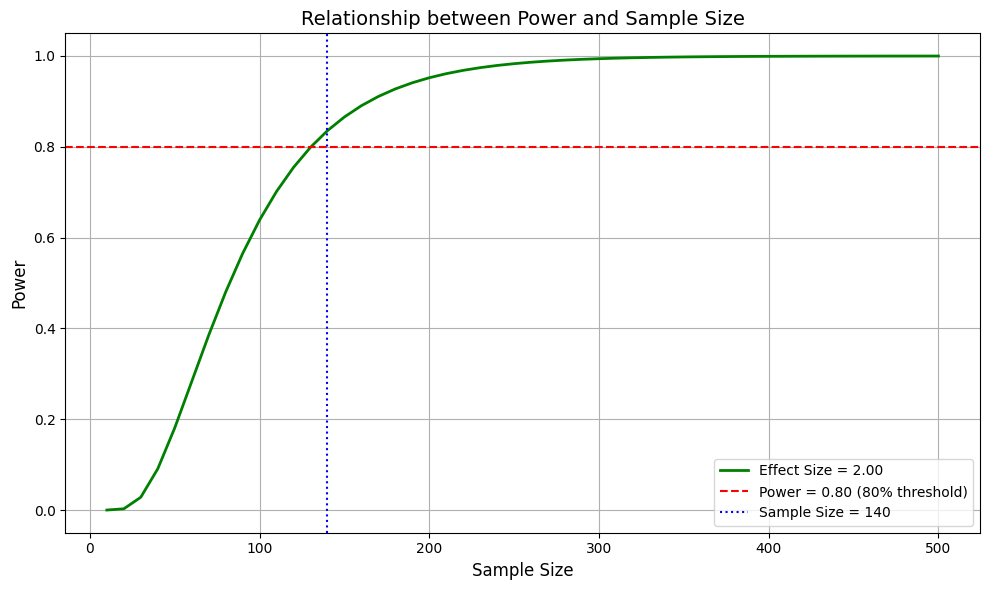

Sample size at which power first reaches 0.80: 140


In [21]:
# Parameters
mu_null = 0  # Mean under null hypothesis (H0)
mu_alt = 2   # Mean under alternative hypothesis (H1)
sigma = 10   # Standard deviation
alpha = 0.05  # Significance level
effect_size = (mu_alt - mu_null) / sigma  # Effect size (Cohen's d)

# Range of sample sizes
sample_sizes = np.arange(10, 501, 10)
power_values = []

# Calculate power for each sample size
for n in sample_sizes:
    # Standard error
    std_error = sigma / np.sqrt(n)
    
    # Calculate z_critical for given alpha
    z_critical = norm.ppf(1 - alpha, mu_null, std_error)
    
    # Calculate the z-score for the alternative hypothesis mean (mu_alt)
    z_power = (mu_alt - mu_null) / std_error
    
    # Power is the probability that the test statistic exceeds the critical value
    power = 1 - norm.cdf(z_critical - z_power)
    power_values.append(power)

# Z-score for the desired confidence level (two-tailed test)
z = norm.ppf(1 - alpha / 2)  # 1 - alpha/2 for two-tailed

# Effect size (the difference between the alternative and null hypothesis means)
effect_size = abs(mu_alt - mu_null)

# Calculate the required sample size (n)
n = (z * sigma / effect_size) ** 2
n = math.ceil(n)  # Round up to the next whole number

# Output the result
print(f"Required sample size (n): {n}")

# Find the sample size where the power first reaches 0.80
target_power = 0.80
sample_size_at_target_power = None

for i, power in enumerate(power_values):
    if power >= target_power:
        sample_size_at_target_power = sample_sizes[i]
        break

# Plotting the power vs. sample size
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, power_values, label=f'Effect Size = {effect_size:.2f}', color='green', lw=2)
plt.axhline(0.80, color='red', linestyle='--', label='Power = 0.80 (80% threshold)')

# Draw a vertical dotted line at the sample size where power reaches 0.80
if sample_size_at_target_power:
    plt.axvline(x=sample_size_at_target_power, color='blue', linestyle=':', label=f'Sample Size = {sample_size_at_target_power}')

# Labels and Title
plt.title('Relationship between Power and Sample Size', fontsize=14)
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Power', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

# Print the sample size at which power first reaches 0.80
print(f"Sample size at which power first reaches 0.80: {sample_size_at_target_power}")
